In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [34]:
import pandas as pd # load and manipulate data and for One-Hot Encoding
import numpy as np # calculate the mean and standard deviation
import xgboost as xgb # XGBoost stuff
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer # for scoring during cross validation
from sklearn.model_selection import GridSearchCV # cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix

In [35]:
train = pd.read_csv('./customer-churn-prediction-2020/train.csv')
test = pd.read_csv('./customer-churn-prediction-2020/test.csv')
train.shape,test.shape

((4250, 20), (750, 20))

In [36]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


## CLean Data

- Handle Missing values

In [37]:
train.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [38]:
train.columns[train.isna().any()].tolist()

[]

In [39]:
test.columns[train.isna().any()].tolist()

[]

In [40]:
X = train.drop('churn', axis=1).copy()
y = train['churn'].copy()

In [41]:
X.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3


In [42]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: churn, dtype: object

In [43]:
X['state'].unique()

array(['OH', 'NJ', 'OK', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT',
       'NY', 'ID', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC', 'WY', 'HI', 'NH',
       'AK', 'GA', 'MD', 'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'SD',
       'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'VT', 'KY', 'ME', 'MS', 'AL',
       'NE', 'KS', 'TN', 'IL', 'PA', 'CT', 'ND'], dtype=object)

In [44]:
X['area_code'].unique()

array(['area_code_415', 'area_code_408', 'area_code_510'], dtype=object)

In [45]:
X['international_plan'].unique()

array(['no', 'yes'], dtype=object)

In [46]:
X['voice_mail_plan'].unique()

array(['yes', 'no'], dtype=object)

In [47]:
X['international_plan'] = np.where(X['international_plan'].str.contains('yes'), 1, 0)
X['voice_mail_plan'] = np.where(X['voice_mail_plan'].str.contains('yes'), 1, 0)

test['international_plan'] = np.where(test['international_plan'].str.contains('yes'), 1, 0)
test['voice_mail_plan'] = np.where(test['voice_mail_plan'].str.contains('yes'), 1, 0)

In [48]:
X.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3


In [49]:
X = pd.get_dummies(X, columns = ['state', 'area_code'])

test = pd.get_dummies(test, columns = ['state', 'area_code'])

X.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,1,0
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,1,0
2,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,1,0,0
3,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,1,0
4,121,0,1,24,218.2,88,37.09,348.5,108,29.62,...,0,0,0,0,0,0,0,0,0,1


In [50]:
y.unique()

array(['no', 'yes'], dtype=object)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [52]:
X_train.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
3714,101,0,1,39,147.2,105,25.02,168.8,96,14.35,...,0,0,0,0,0,0,0,0,1,0
417,41,0,0,0,159.3,66,27.08,125.9,75,10.70,...,0,0,0,0,0,0,0,0,1,0
952,144,0,1,33,251.6,87,42.77,197.6,118,16.80,...,0,0,0,0,0,0,0,0,1,0
2434,123,0,1,32,212.3,77,36.09,251.5,78,21.38,...,0,0,0,0,0,0,0,0,0,1
1827,120,0,1,33,299.5,83,50.92,163.4,84,13.89,...,0,0,0,0,0,0,0,0,1,0


### Modeling
- Build and Evaluate Model

In [53]:
# ## NOTE: When data are imbalanced, the XGBoost manual says...
# ## If you care only about the overall performance metric (AUC) of your prediction
# ##     * Balance the positive and negative weights via scale_pos_weight
# ##     * Use AUC for evaluation
# ## ALSO NOTE: I ran GridSearchCV sequentially on subsets of parameter options, rather than all at once
# ## in order to optimize parameters in a short period of time.

## ROUND 1
param_grid = {
     'max_depth': [3, 4, 5],
     'learning_rate': [0.1, 0.01, 0.05],
     'gamma': [0, 0.25, 1.0],
     'reg_lambda': [0, 1.0, 10.0],
     'scale_pos_weight': [1, 3, 5] # NOTE: XGBoost recommends sum(negative instances) / sum(positive instances)
}
# Output: {'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 10.0, 'scale_pos_weight': 1}
# Because learning_rate and reg_lambda were at the ends of their range, we will continue to explore those...

# ## ROUND 2
param_grid = {
     'max_depth': [4],
     'learning_rate': [0.1, 0.5, 1],
     'gamma': [0.25],
     'reg_lambda': [10.0, 20, 100],
      'scale_pos_weight': [1]
}
# ## Output: {'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 10.0, 'scale_pos_weight': 1}

## NOTE: To speed up cross validiation, and to further prevent overfitting.
## We are only using a random subset of the data (90%) and are only
## using a random subset of the features (columns) (50%) per tree.
optimal_params = GridSearchCV(
     estimator=xgb.XGBClassifier(objective='binary:logistic', 
                                 seed=42,
                                 subsample=0.9,
                                 colsample_bytree=0.5),
     param_grid=param_grid,
     scoring='roc_auc', ## see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
     verbose=0, # NOTE: If you want to see what Grid Search is doing, set verbose=2
     n_jobs = 10,
     cv = 3
 )

optimal_params.fit(X_train, 
                    y_train, 
                    early_stopping_rounds=10,                
                    eval_metric='auc',
                    eval_set=[(X_test, y_test)],
                    verbose=False)
print(optimal_params.best_params_)

C:\Users\gloom\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


{'gamma': 0.25, 'learning_rate': 0.5, 'max_depth': 4, 'reg_lambda': 10.0, 'scale_pos_weight': 1}


In [54]:
# Evaluate Optimized Model
clf_xgb = xgb.XGBClassifier(seed=42,
                        objective='binary:logistic',
                        gamma=0.25,
                        learn_rate=0.01,
                        max_depth=4,
                        reg_lambda=10,
                        scale_pos_weight=1,
                        subsample=0.9,
                        colsample_bytree=0.5)
clf_xgb.fit(X_train, 
            y_train, 
            verbose=True, 
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)])

[20:18:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learn_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-aucpr:0.41627
[1]	validation_0-aucpr:0.65711
[2]	validation_0-aucpr:0.67483
[3]	validation_0-aucpr:0.72709
[4]	validation_0-aucpr:0.73353
[5]	validation_0-aucpr:0.75141
[6]	validation_0-aucpr:0.75238
[7]	validation_0-aucpr:0.76179
[8]	validation_0-aucpr:0.76459
[9]	validation_0-aucpr:0.79890
[10]	validation_0-aucpr:0.80936
[11]	validation_0-aucpr:0.82895
[12]	validation_0-aucpr:0.83345
[13]	validation_0-aucpr:0.83704
[14]	validation_0-aucpr:0.84236
[15]	validation_0-aucpr:0.84298
[16]	validation_0-aucpr:0.84433
[17]	validation_0-aucpr:0.84632
[18]	validation_0-aucpr:0.84500
[19]	validatio

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.25, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learn_rate=0.01, learning_rate=0.300000012, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=10,
              scale_pos_weight=1, seed=42, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [55]:
preds = clf_xgb.predict(X_test)

accuracy = (preds == y_test).sum().astype(float)/len(preds)*100

print("XGBoost's prediction accuracy with optimal hyperparameters is: %3.2f" % (accuracy))

XGBoost's prediction accuracy with optimal hyperparameters is: 95.67


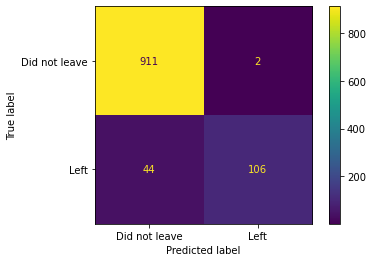

In [56]:
plot_confusion_matrix(clf_xgb, 
                      X_test, 
                      y_test,
                      values_format='d',
                      display_labels=["Did not leave", "Left"])

In [60]:
predictor_cols = X_test.columns
# Use the model to make predictions
predicted = clf_xgb.predict(test[predictor_cols])
# We will look at the predicted prices to ensure we have something sensible.

In [59]:
submission = pd.DataFrame({'id': test.id, 'churn': predicted})

#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'churn.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: churn.csv
